In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1);

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.shape

(246, 14)

In [5]:
df.isna().sum()


day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

## Data cleaning


In [6]:
df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
# 126 line of dataset
# Bejaia Region Dataset -0
# Sidi-Bel Abbes Region Dataset =>1
#till 122 they are bejaia

In [8]:
df.loc[:122,"Region"]=0
df.loc[122:,"Region"]=1

In [9]:
df.info()
#making region as float
df["Region"]=df['Region'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [11]:
# removing 122 row
df=df.dropna();

In [12]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df=df.reset_index()

In [14]:
df.iloc[[122]]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [15]:
df.drop(122,inplace=True)

In [16]:
df.iloc[122]

index                  124
day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   1
Name: 123, dtype: object

In [17]:
df=df.reset_index()

#### iloc[122] vs iloc[[122]]

In [18]:
df.iloc[122]
df.iloc[[122]]

,level_0,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,123,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [19]:
df.columns

Index(['level_0', 'index', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws',
       'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ',
       'Region'],
      dtype='object')

In [20]:
# Here classes has an extra space

In [21]:
df.rename(columns={"Classes  ":"Classes"},inplace=True)

In [22]:
df.rename(columns={" RH":"RH",},inplace=True)

In [23]:
df.columns=df.columns.str.strip()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      243 non-null    int64 
 1   index        243 non-null    int64 
 2   day          243 non-null    object
 3   month        243 non-null    object
 4   year         243 non-null    object
 5   Temperature  243 non-null    object
 6   RH           243 non-null    object
 7   Ws           243 non-null    object
 8   Rain         243 non-null    object
 9   FFMC         243 non-null    object
 10  DMC          243 non-null    object
 11  DC           243 non-null    object
 12  ISI          243 non-null    object
 13  BUI          243 non-null    object
 14  FWI          243 non-null    object
 15  Classes      243 non-null    object
 16  Region       243 non-null    int64 
dtypes: int64(3), object(14)
memory usage: 32.4+ KB


## Changing Columns data type

In [25]:
df['day']=df["day"].astype(int)

In [26]:
df[['day','month','year']]=df[['day','month','year']].astype(int)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      243 non-null    int64 
 1   index        243 non-null    int64 
 2   day          243 non-null    int64 
 3   month        243 non-null    int64 
 4   year         243 non-null    int64 
 5   Temperature  243 non-null    object
 6   RH           243 non-null    object
 7   Ws           243 non-null    object
 8   Rain         243 non-null    object
 9   FFMC         243 non-null    object
 10  DMC          243 non-null    object
 11  DC           243 non-null    object
 12  ISI          243 non-null    object
 13  BUI          243 non-null    object
 14  FWI          243 non-null    object
 15  Classes      243 non-null    object
 16  Region       243 non-null    int64 
dtypes: int64(6), object(11)
memory usage: 32.4+ KB


In [28]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [29]:
df['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [30]:
df['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [31]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [32]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)

## Doing things fast

In [33]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   level_0      243 non-null    int64 
 1   index        243 non-null    int64 
 2   day          243 non-null    int64 
 3   month        243 non-null    int64 
 4   year         243 non-null    int64 
 5   Temperature  243 non-null    int64 
 6   RH           243 non-null    int64 
 7   Ws           243 non-null    int64 
 8   Rain         243 non-null    object
 9   FFMC         243 non-null    object
 10  DMC          243 non-null    object
 11  DC           243 non-null    object
 12  ISI          243 non-null    object
 13  BUI          243 non-null    object
 14  FWI          243 non-null    object
 15  Classes      243 non-null    object
 16  Region       243 non-null    int64 
dtypes: int64(9), object(8)
memory usage: 32.4+ KB


In [34]:
print(df['FWI'].dtype)

object


In [35]:
list=[ x for x in df.columns if df[x].dtypes==object]
#list=[ x for x in df.columns if df[x].dtype=='O']
#list=[ x for x in df.columns if df[x].dtype==df['Classes'].dtype)

In [36]:
list

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [37]:
for x in list:
    if(x!="Classes"):
        df[x]=df[x].astype(float)

In [38]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   level_0      243 non-null    int64  
 1   index        243 non-null    int64  
 2   day          243 non-null    int64  
 3   month        243 non-null    int64  
 4   year         243 non-null    int64  
 5   Temperature  243 non-null    int64  
 6   RH           243 non-null    int64  
 7   Ws           243 non-null    int64  
 8   Rain         243 non-null    float64
 9   FFMC         243 non-null    float64
 10  DMC          243 non-null    float64
 11  DC           243 non-null    float64
 12  ISI          243 non-null    float64
 13  BUI          243 non-null    float64
 14  FWI          243 non-null    float64
 15  Classes      243 non-null    object 
 16  Region       243 non-null    int64  
dtypes: float64(7), int64(9), object(1)
memory usage: 32.4+ KB


In [39]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

In [40]:
df_with_data=df.copy()

# EDA

In [41]:
# as day, month ,year are of no use we can drop these features

In [42]:
df.drop(columns=["day","month","year"],inplace=True);

In [43]:
df.head()

,level_0,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [44]:
df.drop(columns=["level_0"],inplace=True)

### Encoding the Classes section

In [45]:
df['Classes'].unique()
#
'''array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)
       '''

"array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',\n       'not fire     ', 'not fire    '], dtype=object)\n       "

In [46]:
df['Classes']=df['Classes'].str.strip()

In [47]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

In [48]:
df['Classes']=df['Classes'].map({"not fire":1,"fire":0})

In [49]:
df['Classes'].unique()

array([1, 0])

In [50]:
df['Classes'].dtype

dtype('int64')

In [51]:
df['Classes'].value_counts()/len(df['Classes'])*100

Classes
0    56.378601
1    43.621399
Name: count, dtype: float64

## Visualization

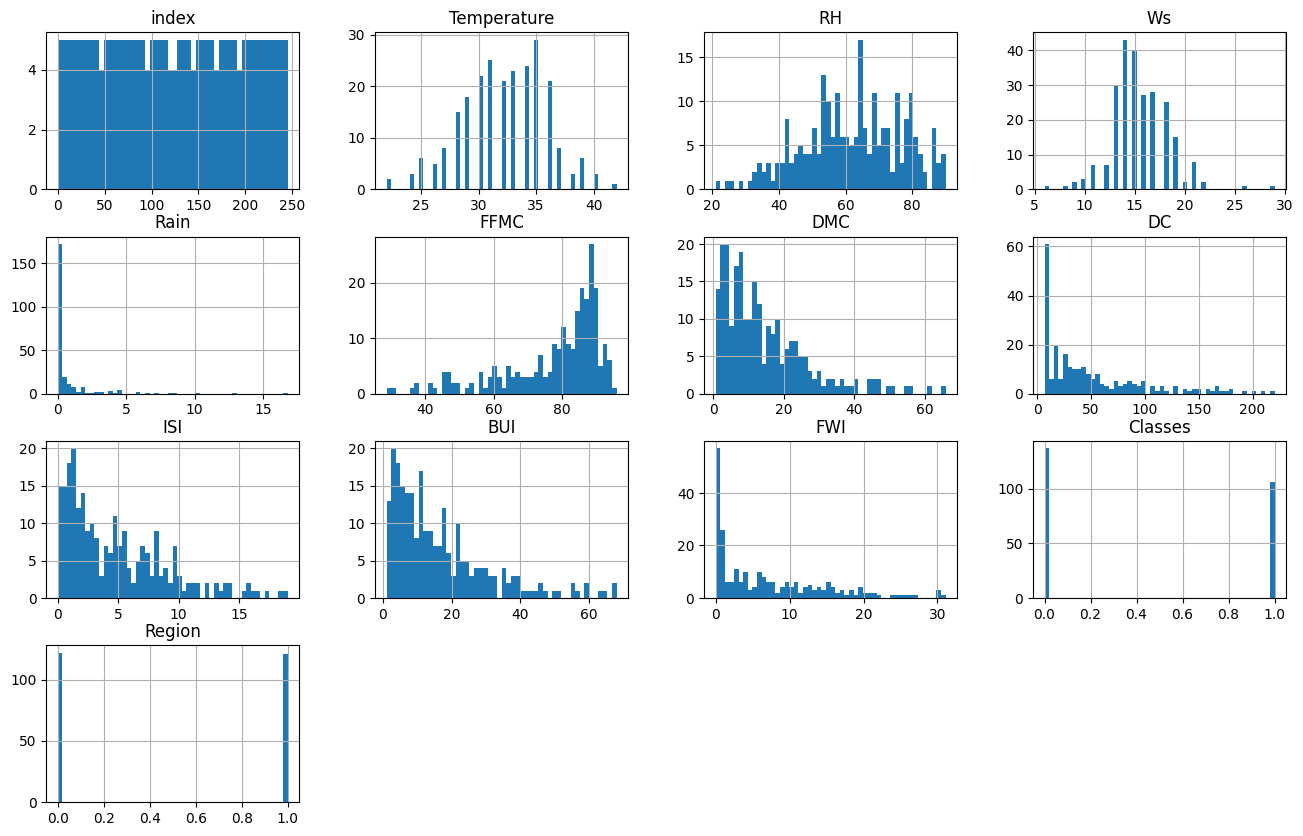

In [52]:

df.hist(bins=50,figsize=(16,10));

In [53]:
df.corr()

,index,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
index,1.000000,0.217385,-0.378265,-0.170876,-0.031468,0.227708,0.258884,0.056385,0.281342,0.181099,0.253037,-0.176627,0.869435
Temperature,0.217385,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.378265,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,-0.170876,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.031468,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.227708,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.258884,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.056385,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734
ISI,0.281342,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,-0.735197,0.263197
BUI,0.181099,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,-0.586639,0.089408


In [57]:
df_with_data['Classes']=df_with_data['Classes'].map({"not fire":1,"fire":0})

<Axes: >

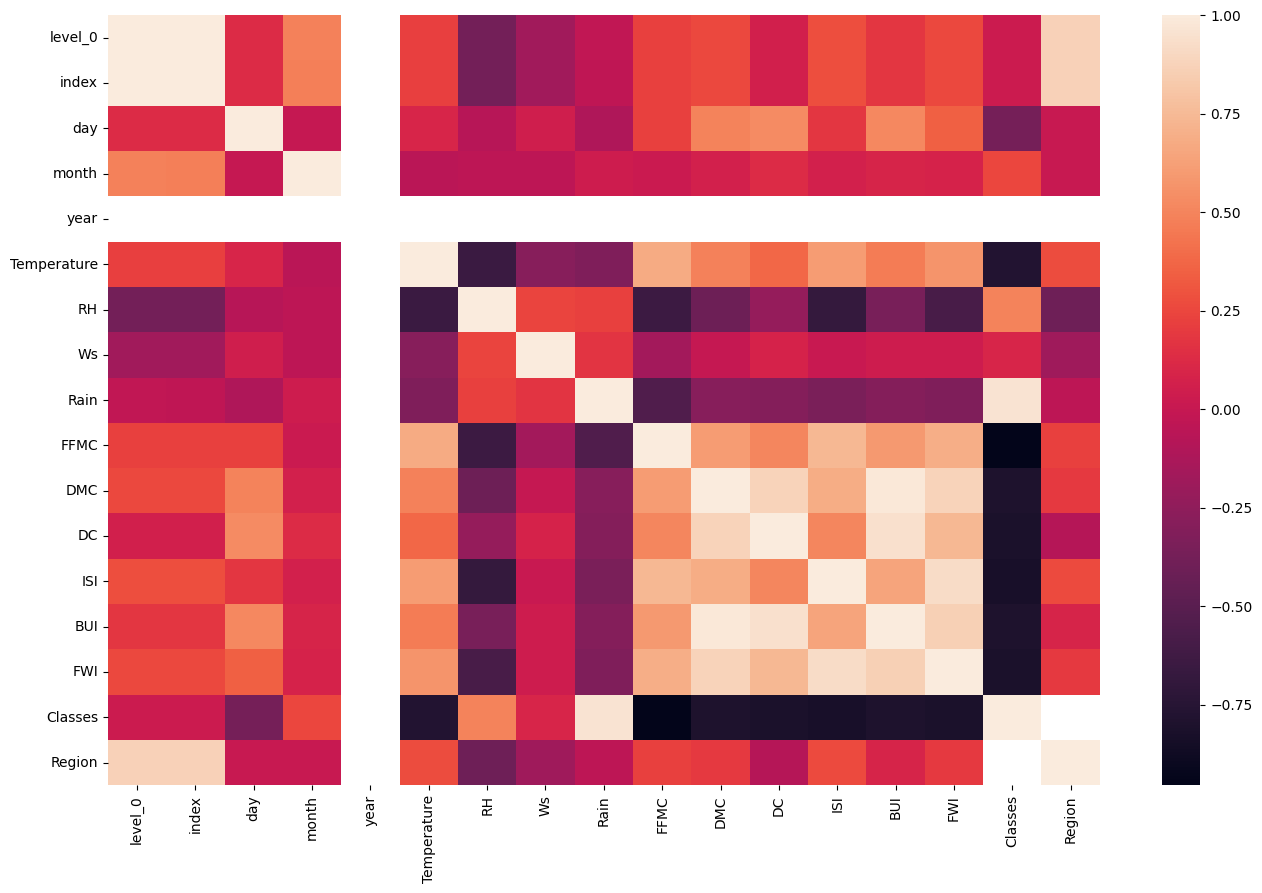

In [58]:
plt.figure(figsize=(16,10))
sns.heatmap(df_with_data.corr())

SyntaxError: unmatched ')' (1429778609.py, line 3)